In [1]:
pwd

'/content'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
df_test = pd.read_csv('test_data.txt', sep=":::", header = 0 , engine = 'python')
df_train = pd.read_csv('train_data.txt', sep=":::", header = 0 , engine = 'python')
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name' , 'confession']

In [4]:
df_test.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [5]:
df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          9821 non-null   int64 
 1   movie_name  9821 non-null   object
 2   confession  9821 non-null   object
dtypes: int64(1), object(2)
memory usage: 230.3+ KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11179 entries, 0 to 11178
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          11179 non-null  int64 
 1   movie_name  11179 non-null  object
 2   category    11178 non-null  object
 3   confession  11178 non-null  object
dtypes: int64(1), object(3)
memory usage: 349.5+ KB


In [8]:
df_train.describe()

,SN
count,11179.000000
mean,5591.000000
std,3227.243664
min,2.000000
25%,2796.500000
50%,5591.000000
75%,8385.500000
max,11180.000000


In [9]:
df_test.describe()

,SN
count,9821.000000
mean,4912.000000
std,2835.222831
min,2.000000
25%,2457.000000
50%,4912.000000
75%,7367.000000
max,9822.000000


In [10]:
df_test.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [11]:
df_train.isnull().sum()

SN            0
movie_name    0
category      1
confession    1
dtype: int64

In [12]:
df_train.iloc[0:3]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [13]:
df_train.loc[0]

SN                                                            2
movie_name                                        Cupid (1997) 
category                                              thriller 
confession     A brother and sister with a past incestuous r...
Name: 0, dtype: object

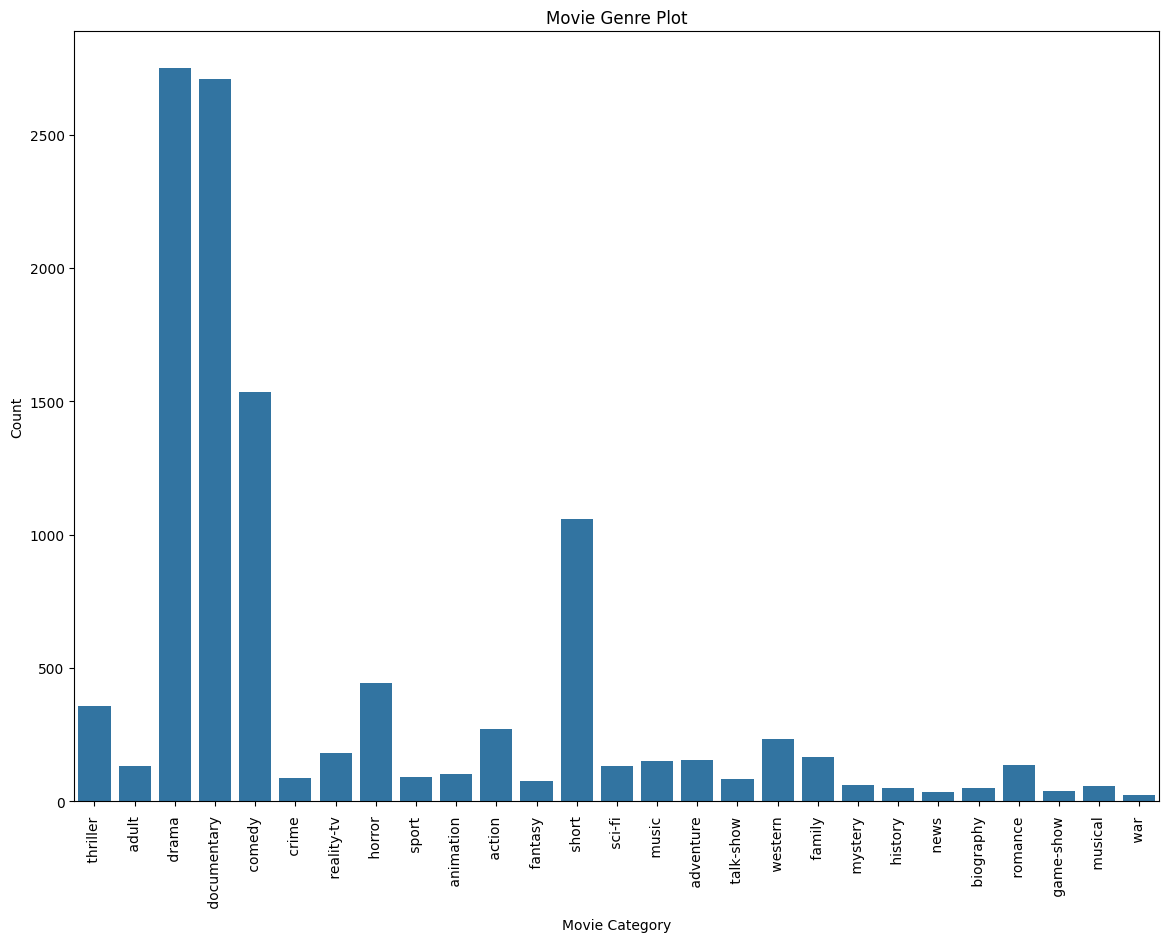

In [14]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

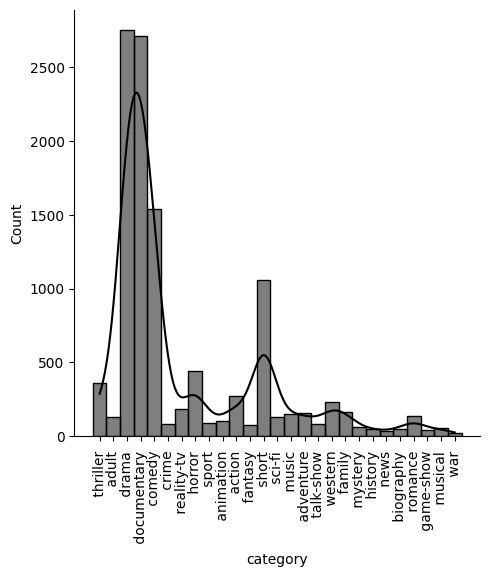

In [15]:
sns.displot(df_train.category, kde =True, color = "black")
plt.xticks(rotation=90);

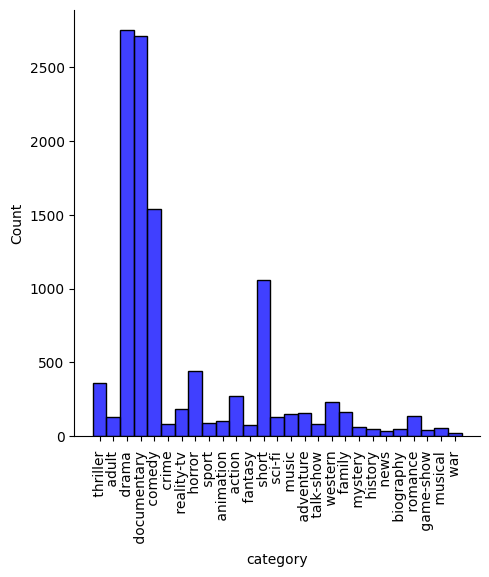

In [16]:
sns.displot(df_train.category, kde=False, color = "blue")
plt.xticks(rotation=90);

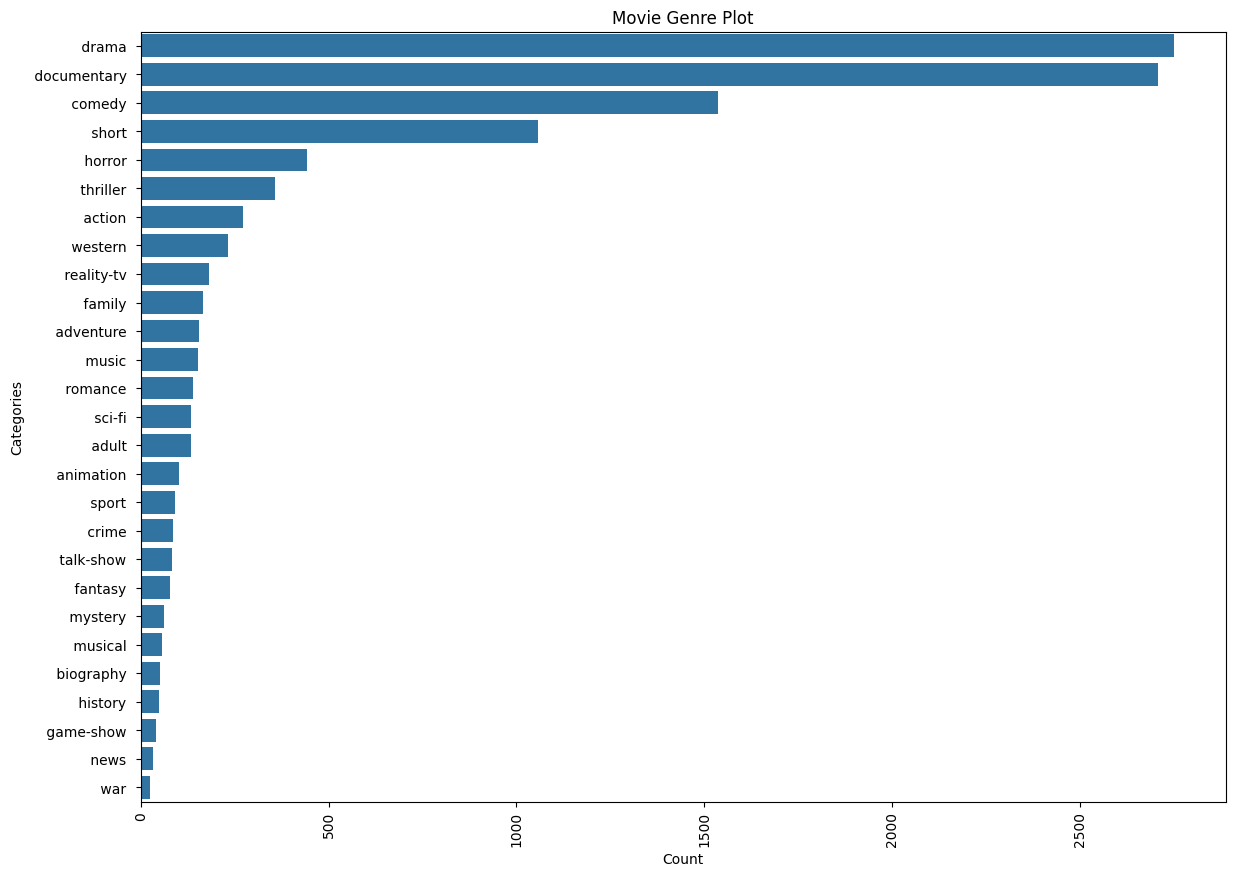

In [17]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

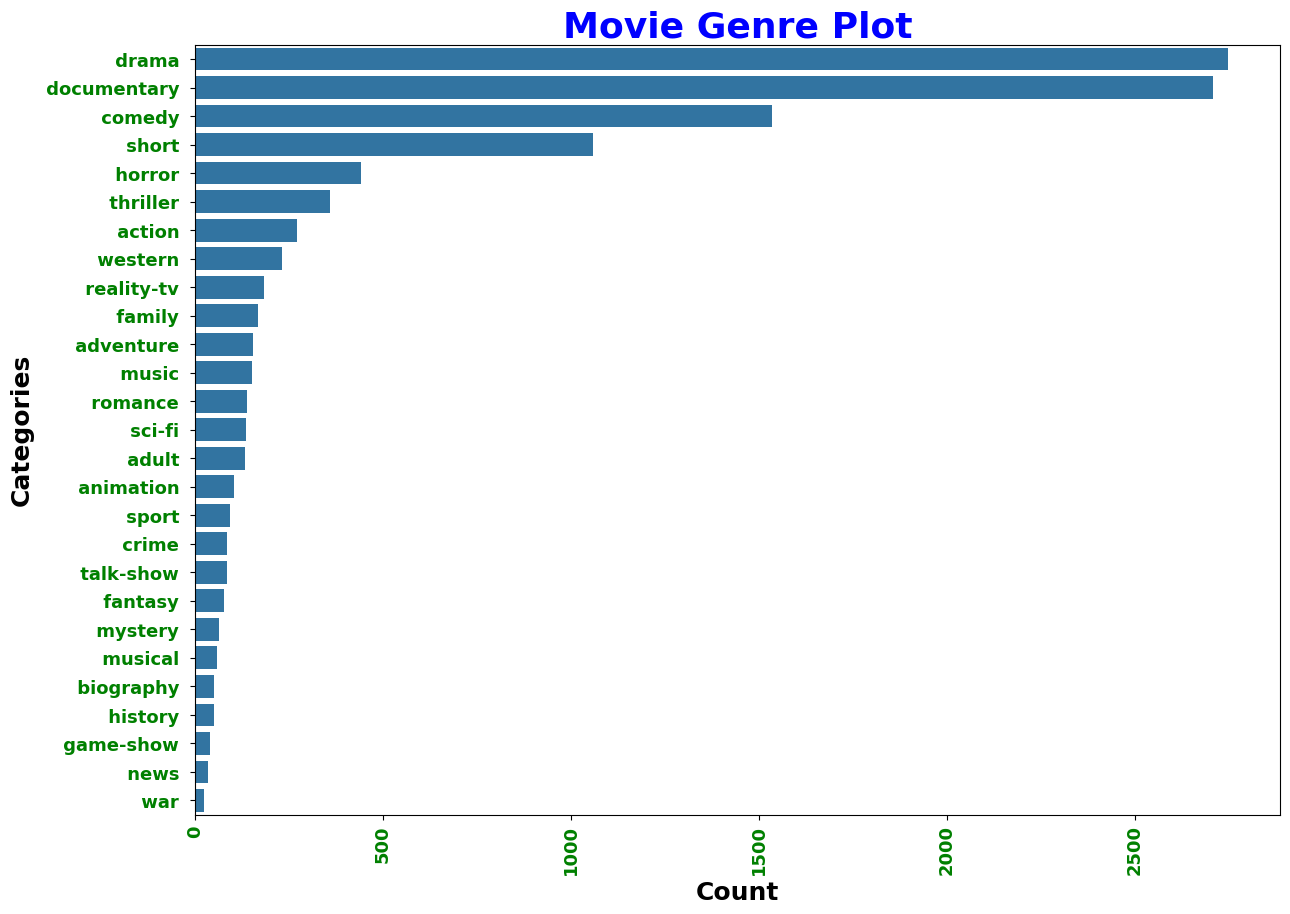

In [18]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 18, fontweight = 'bold')
plt.ylabel('Categories', fontsize = 18, fontweight = 'bold')
plt.title('Movie Genre Plot', fontsize = 26, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 13, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'green')
plt.show()

In [19]:
df_combined = pd.concat([df_train, df_test], axis = 0)
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [20]:
df_combined.isnull().any()

SN            False
movie_name    False
category       True
confession     True
dtype: bool

In [21]:
encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"].values)
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)
df_combined.head()

,SN,movie_name,category,confession
0,2,5967,24,A brother and sister with a past incestuous r...
1,3,20805,1,As the bus empties the students for their fie...
2,4,18591,8,To help their unemployed father make ends mee...
3,5,18871,8,The film's title refers not only to the un-re...
4,6,14268,7,Quality Control consists of a series of 16mm ...


In [23]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())
df_combined.count()

SN            21000
movie_name    21000
category      21000
confession    20999
dtype: int64

In [24]:
df_combined.duplicated().values.any()

False

In [34]:
# Fill None values with empty strings
df_combined['confession'] = df_combined['confession'].fillna('')

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_combined['confession'])

# Check the first few rows of the dataframe
df_combined.head()


,SN,movie_name,category,confession
0,2,5967,24,A brother and sister with a past incestuous r...
1,3,20805,1,As the bus empties the students for their fie...
2,4,18591,8,To help their unemployed father make ends mee...
3,5,18871,8,The film's title refers not only to the un-re...
4,6,14268,7,Quality Control consists of a series of 16mm ...


In [35]:
y = df_combined["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [37]:
nb_predictions = naive_bayes_model.predict(X_test)
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))

Naive Bayes Model:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   43]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   31]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   33]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   22]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    5]
 [   0    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  312]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr_predictions = logistic_regression_model.predict(X_test)
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))

Logistic Regression Model:
[[   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   42]
 [   0    0    0    0    0    2    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   29]
 [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   32]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   22]
 [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   0    0    0    0    0    9    0    0    4    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  300]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
